# District Labels

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
# this reads in our module for selecting and 
# reading in the training data
import sys
sys.path.insert(1, '../../../code/training_data')
import district_training_data as dtd 

In [6]:
data_dir = "../../../preprocessed/" 

# network_type = "vgg16_4096"

# PCA_components = 18

# LABELING_METHOD = "maximum"
# AVERAGING_METHOD = "kaist"

normalize = "Total"
norm_dict = {
	True:"normalized_",
	False: "",
	"Total": "normalized_across_all_"
}
        

In [7]:
label_columns = ["hType_mix", "num_intersect", "bld_avg_age", "emp_rat_num",\
				"LUM5_single",	"RNR_nres", "mdist_smallparks", "nig_rat_daily",\
				"nig_rat_daily3", "mdist_nres_daily", "num_community_places", \
				"num_community_places_poi", "avg_block_area", "sphi", \
				"enterprises_empl_size", "pop_rat_num",  \
				"emp_rat_pop", "den_nres_daily",\
				"mdist_parks", "den_nres_non-daily", "mdist_railways",\
				"mdist_highways", "mdist_water", "activity_density"] # "bld_rat_area", 

# Original labels

In [18]:
df = dtd.get_labels(pred_type="regression", normalize=False, data_dir=data_dir)

In [19]:
small_blocks = ["avg_block_area","num_intersect", "sphi"]
small_blocks_cols = ["label_"+l for l in small_blocks]

In [20]:
land_use = [
"LUM5_single","RNR_nres","mdist_smallparks",
"hType_mix", "nig_rat_daily", "nig_rat_daily3", "mdist_nres_daily", "num_community_places_poi"]
land_use_cols = ["label_"+l for l in land_use]
small_blocks = ["avg_block_area","num_intersect", "sphi"]
small_blocks_cols = ["label_"+l for l in small_blocks]

In [21]:
hist_df = df[land_use_cols  + small_blocks_cols + ['label_activity_density']]

In [22]:
land_use_names = {"label_LUM5_single" : "land use mix", 
                  "label_RNR_nres" : "entropy residential/non-residential",
                  "label_mdist_smallparks": "min dist. small parks",
                  "label_hType_mix" :"housing type mix", 
                  "label_nig_rat_daily" : "nightlife", 
                  "label_nig_rat_daily3" : "nightlife density", 
                  "label_mdist_nres_daily" : "min dist. nearest daily-use POI",
#                   "num_community_places" : "number community places", 
                  "label_num_community_places_poi": "third places"}


small_blocks_names = {"label_avg_block_area": "average block size"
                      ,"label_num_intersect": "intersections density"
                      , "label_sphi" : "anisotropicity blocks"}

activity_density_name = {"label_activity_density" : "activity density"}

In [23]:
hist_df.rename(columns=land_use_names, inplace=True)
hist_df.rename(columns=small_blocks_names, inplace=True)
hist_df.rename(columns=activity_density_name, inplace=True)

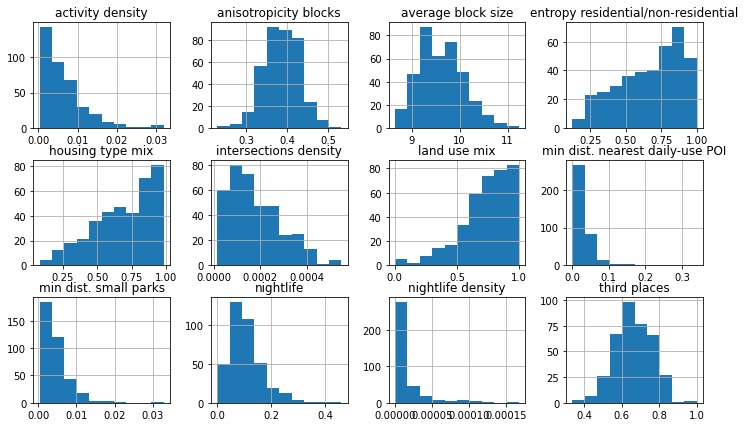

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
h = hist_df.hist(layout=(3,4), ax=ax)

In [25]:
fig.savefig("../../../results/4paper/distJJvars.png", dpi=100)

# Small Blocks

In [8]:
small_blocks = ["avg_block_area","num_intersect", "sphi"]
small_blocks_cols = ["label_"+l for l in small_blocks]

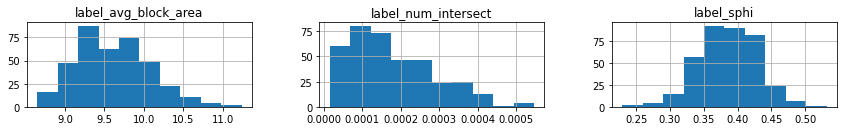

In [12]:
h = df[small_blocks_cols].hist(figsize=(25,44),layout=(22,5))

# Age Buildings

In [13]:
age_buildings = [
"bld_avg_age","enterprises_empl_size"]
age_buildings_cols = ["label_"+l for l in age_buildings]

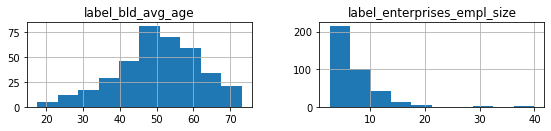

In [14]:
h = df[age_buildings_cols].hist(figsize=(25,44),layout=(22,5))

# Concentration

In [15]:
concentration = [
"pop_rat_num","emp_rat_num","emp_rat_pop"
    ,"den_nres_daily","den_nres_non-daily"]
concentration_cols = ["label_"+l for l in concentration]

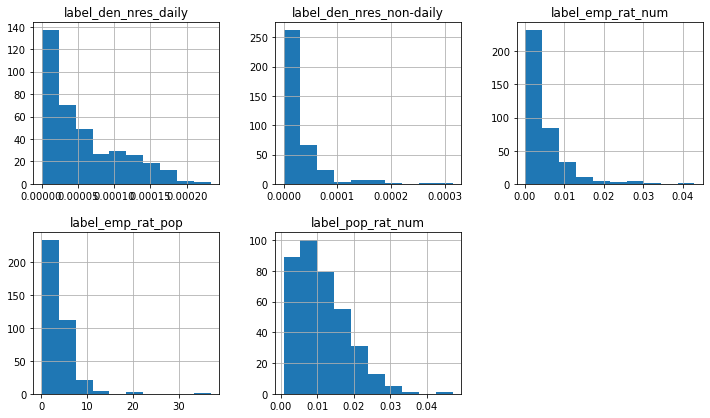

In [16]:
h = df[concentration_cols].hist(figsize=(12,30),layout=(8,3))

# Vacuums

In [17]:
vacuums = ["mdist_parks", "mdist_railways",
"mdist_highways", "mdist_water"]
vacuums_cols = ["label_"+l for l in vacuums]

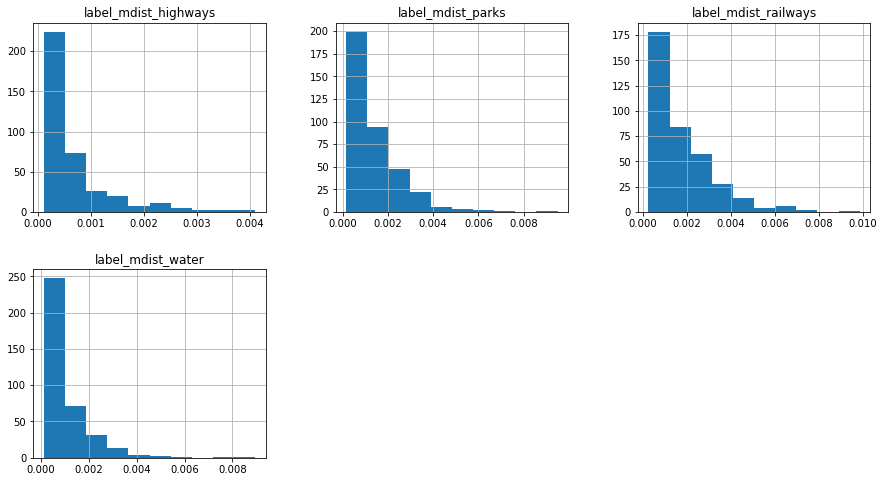

In [18]:
h = df[vacuums_cols].hist(figsize=(15,8),layout=(2,3))

# Normalized Data per City

In [19]:
df = dtd.get_labels(pred_type="regression", normalize=True, data_dir=data_dir)

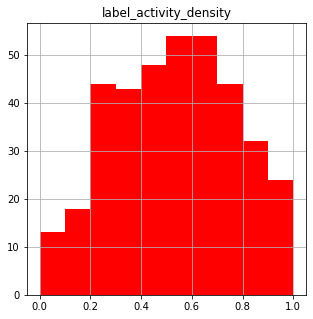

In [20]:
h = df[['label_activity_density']].hist(figsize=(5,5),layout=(1,1), color="red")

# Land Use

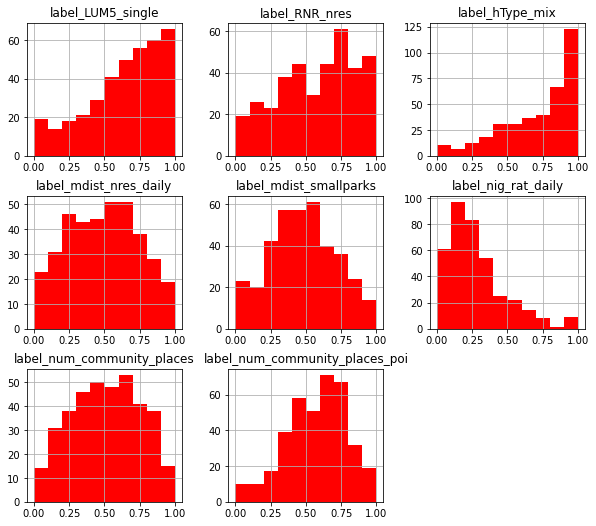

In [21]:
h = df[land_use_cols].hist(figsize=(10,12),layout=(4,3), color="red")

# Smal Blocks

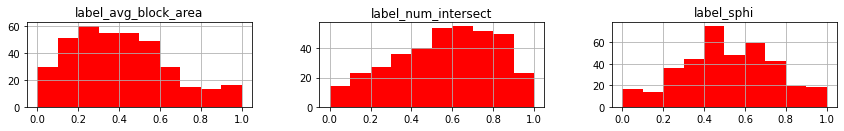

In [22]:
h = df[small_blocks_cols].hist(figsize=(25,44),layout=(22,5), color="red")

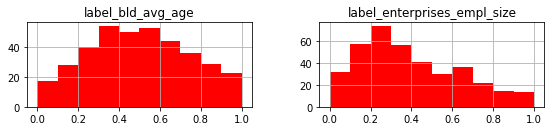

In [23]:
h = df[age_buildings_cols].hist(figsize=(25,44),layout=(22,5), color="red")

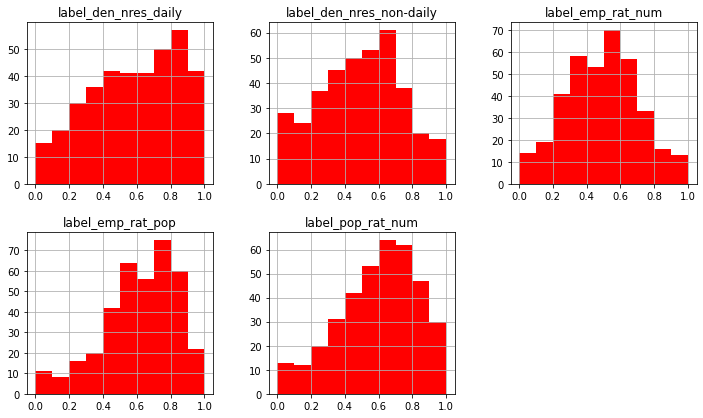

In [24]:
h = df[concentration_cols].hist(figsize=(12,30),layout=(8,3), color="red")

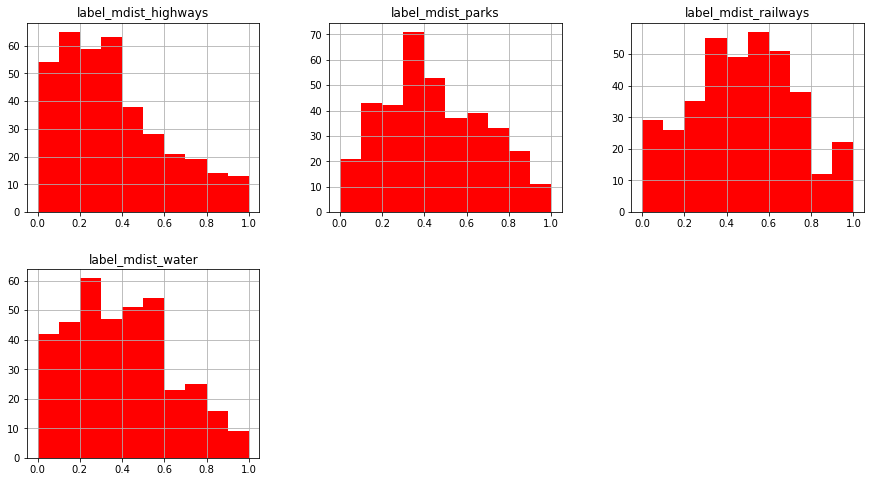

In [25]:
h = df[vacuums_cols].hist(figsize=(15,8),layout=(2,3), color="red")

# Normalized Data across Total Cities

In [26]:
df = dtd.get_labels(pred_type="regression", normalize="Total", data_dir=data_dir)

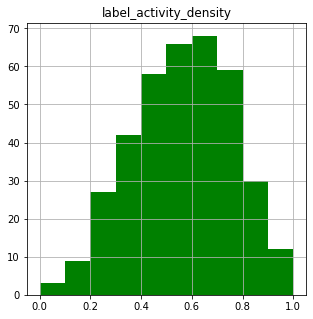

In [27]:
h = df[['label_activity_density']].hist(figsize=(5,5),layout=(1,1), color="green")

# Land Use

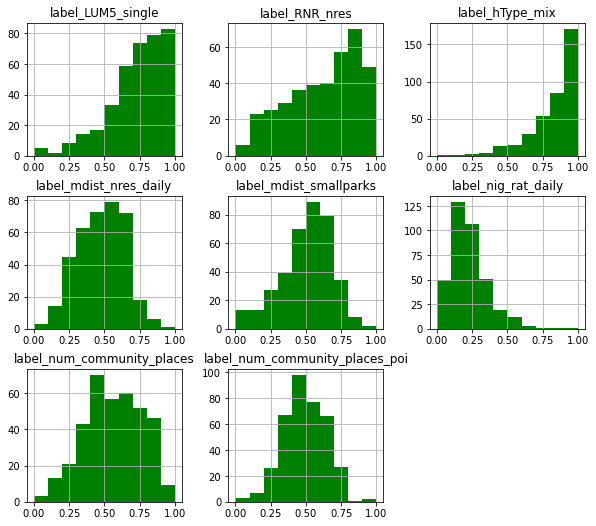

In [28]:
h = df[land_use_cols].hist(figsize=(10,12),layout=(4,3), color="green")

# Smal Blocks

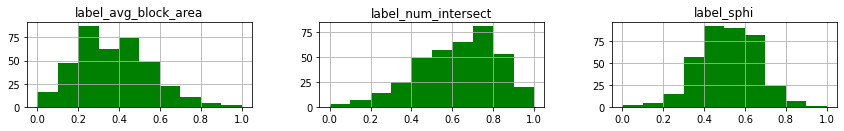

In [29]:
h = df[small_blocks_cols].hist(figsize=(25,44),layout=(22,5), color="green")

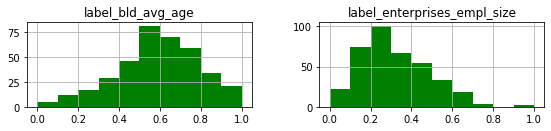

In [30]:
h = df[age_buildings_cols].hist(figsize=(25,44),layout=(22,5), color="green")

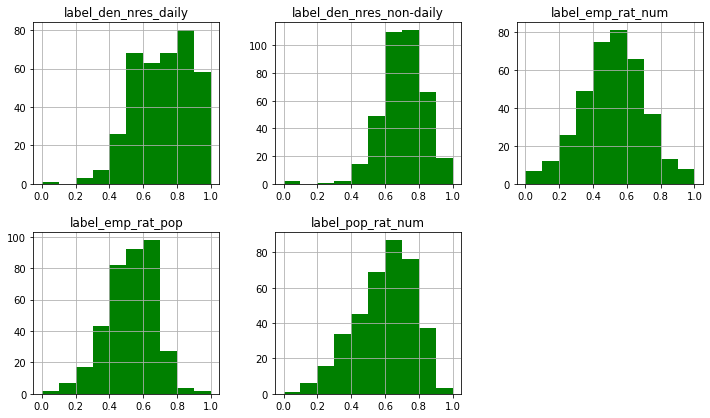

In [31]:
h = df[concentration_cols].hist(figsize=(12,30),layout=(8,3), color="green")

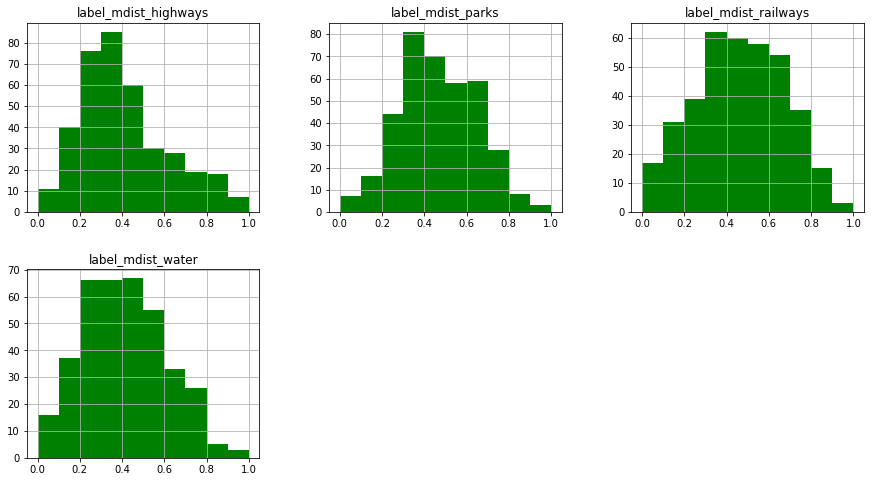

In [32]:
h = df[vacuums_cols].hist(figsize=(15,8),layout=(2,3), color="green")